# Final Report
## Clustering Analysis (with Regression modeling)
### Brandyn Waterman, 4/8/2022, Innis Cohort
Hello and welcome! Let's begin with the needed imports:

In [6]:
# Dataframe manipulations
import pandas as pd
import numpy as np

# Modules needed to perform necessary functions
import wrangle_zillow as w
import explore as e

# Turning off warnings
import warnings
warnings.filterwarnings('ignore')

## Overview:
The purpose of this project is to assist in the prediction of log error for Zillow's Zestimate house value predictions. This will be done by:
- Identifying some of the key drivers behind the log error
- Applying these insights to regression models that can help predict the log error
- Sharing learned insights to provide recommendations and solutions moving forward 

### Planning:
Prior to interacting with the data we want to lay out some of our intentions/initial questions:

Some of the initial questions for the data: 
1. Do primary house attributes impact log error? (bedrooms, bathrooms, age, squarefeet)
2. Do secondary house attributes impact log error? (num_fireplace, threequarter_baths, hottub_or_spa, has_pool)
3. Does geography impact log error? (latitude, longitude, regionidzip, fips)
4. Can we successfully use any of our features to cluster for log error predictions?
    - Geographic clustering
        - Latitude/Longitude
    - Continuous feature clustering
5. What can we identify about the data when log error is postive or negative?

Some of the hypotheses to be explored:
1. Is there a linear relationship between log error and our continuous features? (Pearsonr)
2. Is there a difference in the mean log error for selected subsets and the entire dataset? (one-sample t-test)
3. Is there a difference in the mean log error of particular zip codes and the entire dataset? (one-sample t-test)

### Acquire:
The wrangle_zillow.py module contains the functions used to acquire our data. The get_db_url() function assists in accessing the SQL server and then using a query and the acquire_zillow() function we gather the necessary data and store it in a dataframe. Our initial dataframe contains a number of columns that will be narrowed down through preparation and exploration of the data. 

In [7]:
# In our wrangle_zillow() module we use our acquire_zillow() function to gather the Zillow data from the SQL server
zillow = w.acquire_zillow()

Using cached csv


### Prepare:
After acquiring our data we will need to do a fair bit of modification and or manipulation to make it wholly useful for our purposes. The following are the steps that were taken:
1. Ensuring we are only working with single unit properties, utilizing identifiers from the SQL server
2. Identifying a lack of proper data input for some columns and filling the nulls to signify better inputs
    - Main data this was utilized for: fireplace, hottub/spa, pool, three quarter bath, tax delinquency
3. Dropping leftover null values, and unwanted data (based on unusable or incorrect data inputs)
    - This is done with all encompassing mechanisms (dropna()), non-null proportion requirements by row or column, and eliminating faulty data inputs (e.g. 0 bedrooms)
4. Feature engineering age from yearbuilt data
5. Ensuring columns are the correct data type
6. Removal of outliers to make our outcomes as generally usable as possible
7. Encoding our currently recognized categorical columns
    - fips, hottub_or_spa, has_pool, tax_delinquency
8. Renaming our columns for easier use
9. Splitting our original dataframe into train, validate, and test dataframes

In [9]:
# In our wrangle_zillow() module we use our prepare_zillow() function, with our acquired dataframe
# We clean, prepare, and split the dataframe to produce train, validate, and test dataframes
train, validate, test = w.prepare_zillow(zillow)

### Explore:
...

In [10]:
# We will set our alpha for all of our statistical testing
alpha = .05

To address Question 5 (log error being positive or negative) throughout the exploratory phase we can split our train into positive and negative dataframes.

In [11]:
train_pos = train[train.logerror >= 0]
train_neg = train[train.logerror < 0]

#### Question 1: Do primary house attributes impact log error?
Most of our house attributes are continuous features so we will analyze them all together using some functions in our explore.py module. The linear_tests() function will provide some visualizations and a pearsonr test to describe the relationship between our continuous feature and the target variable. 

From our exploration we visually and statistically confirm the use of all of our continuous features.

In [12]:
# We need to establish our target feature
target = 'logerror'

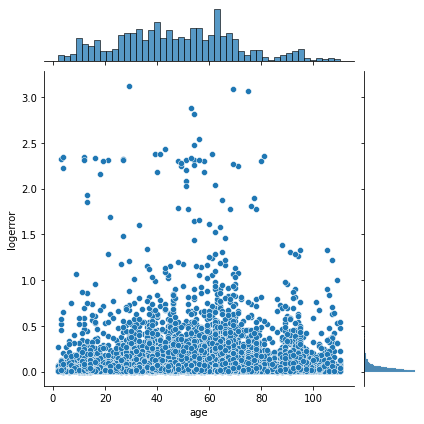

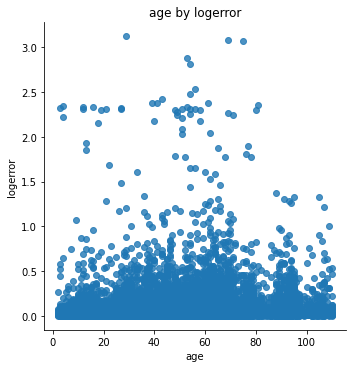

H0: There is no linear relationship between age and logerror.
HA: There is a linear relationship between age and logerror.
----------------------------------------------------------------
p-value: 1.8636961591025224e-43

With a p-value below our established alpha we reject the null hypothesis.


In [15]:
# We can demonstrate continuous feature exploration using our 'age' feature
# For positive log error
e.linear_tests(train_pos, ['age'], target)

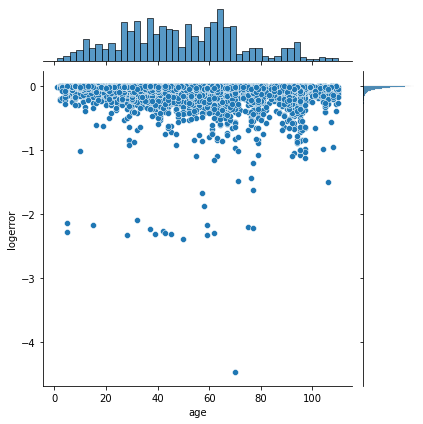

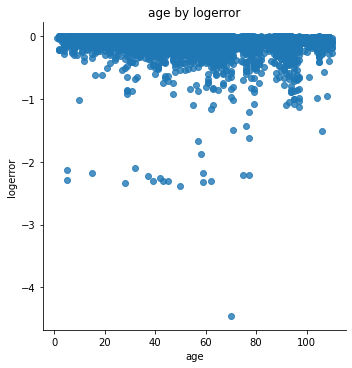

H0: There is no linear relationship between age and logerror.
HA: There is a linear relationship between age and logerror.
----------------------------------------------------------------
p-value: 7.452018292506657e-76

With a p-value below our established alpha we reject the null hypothesis.


In [16]:
# With our negative log error
e.linear_tests(train_neg, ['age'], target)

#### Question 2: Do secondary house attributes impact log error?
Our secondary house attributes were largely categorical and were explored using visualizations and a one-sample t-test. The cat_visuals() function in the explore.py module can be used for visualizations, and the explore notebook can be viewed to see the statistical analysis. 

From our exploration we visually and statistically confirm the use of has_pool and tax_delinquency, but will not be using fips or hottub_or_spa in modeling. 

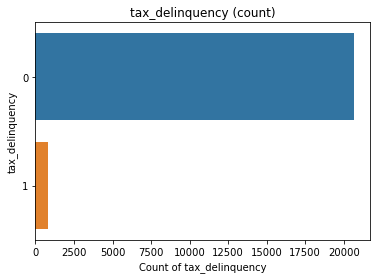

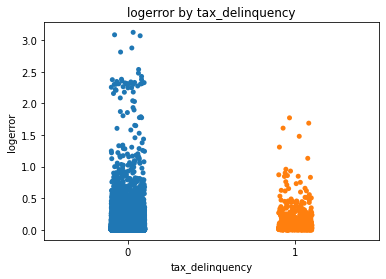

In [17]:
# We can demonstrate categorical feature exploration using our 'tax_delinquency' feature
# For positive log error
e.cat_visuals(train_pos, ['tax_delinquency'], target)

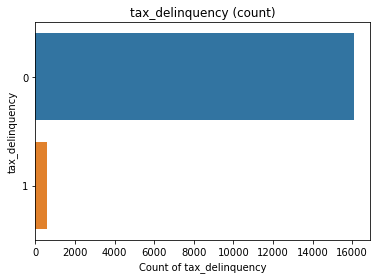

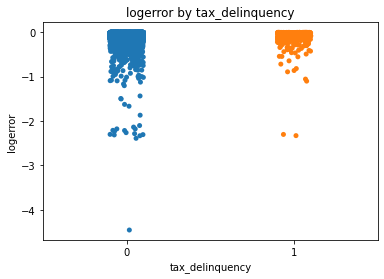

In [18]:
# For negative log error
e.cat_visuals(train_neg, ['tax_delinquency'], target)

Moving forward our exploration digs deeper into clustering work. Prior to clustering a good overview of how little correlation there is currently with our features and our target variable. The heatmap_zillow() function can provide this visual.

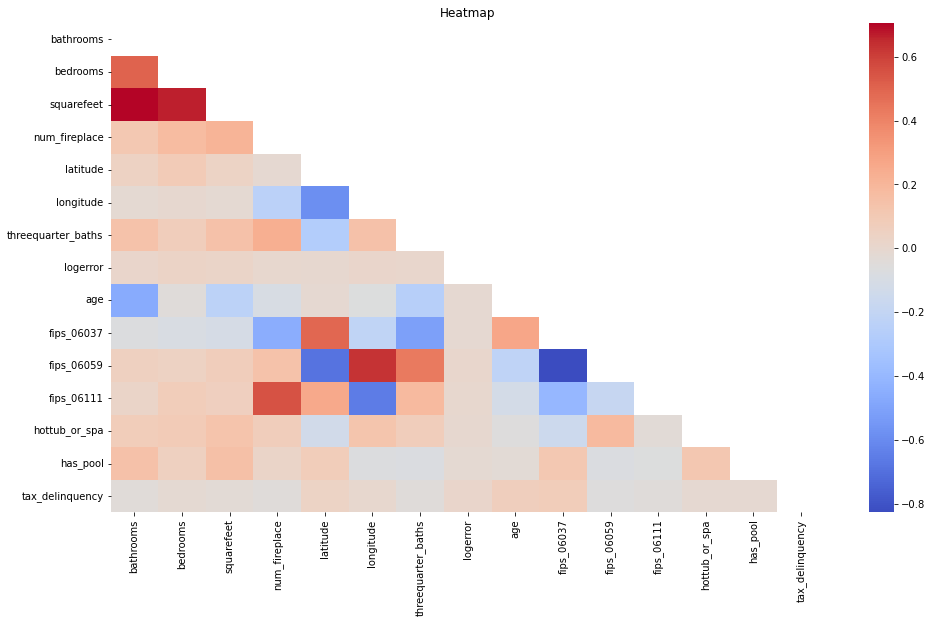

In [19]:
# Using heatmap_zillow() to see if there are any strong correlations with our target variable
e.heatmap_zillow(train)

There is a very weak correlation with age, but nothing in particular has a correlation to log error. We will still be using the features that were deemed significant through statistical tests. 

### Scaling:
Prior to clustering the data we need to scale our continuous features that will be used. To do this we will use our scale_zillow() function that resides in our explore.py module. It will take our train, validate, and test dataframes and return them with scaled features. 

In [24]:
# Selecting our features to scale
quants = ['bathrooms', 'bedrooms', 'squarefeet', 'num_fireplace', 'latitude',
          'longitude', 'threequarter_baths', 'age']

# Scaling our dataframes: train, validate, test
train, validate, test = e.scale_zillow(train, validate, test, quants)

### Clustering:
#### Question 3: Does geography impact log error?
To try to incorporate geographical data we will cluster using latitude and longitude. We will also conduct visualization and statistical testing for our regionidzip feature. 

##### Regionidzip:
Through visualizations and statistical testing (one-sample t-test) a list of statistically significant zip codes were selected to move forward with for modeling. This work can be seen in the explore notebook. 

#### Question 4: Can we successfully use any of our features to cluster for log error predictions? 

#### Question 5: What can we identify about the data when log error is positive or negative? 

### Exploration Summary:
...